In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.classify import NaiveBayesClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from math import *
from numpy import *
from sklearn.pipeline import Pipeline
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
import os
import string
import gensim
from gensim.models import Word2Vec
import pandas as pd
import random
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from collections import Counter
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import nltk.data

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ashutoshtripathi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data = pd.read_csv('./train_pe.csv')
data.Result[128]
#workabledata

'{\\rtf1\\ansi\\ansicpg1252\\deff0\\deflang1033{\\fonttbl{\\f0\\froman\\fprq2\\fcharset0 Times New Roman;}{\\f1\\fnil\\fcharset0 Microsoft Sans Serif;}}\r\n{\\colortbl ;\\red0\\green0\\blue0;}\r\n{\\stylesheet{ Normal;}{\\s1 heading 1;}{\\s2 heading 2;}}\r\n\\viewkind4\\uc1\\pard\\keepn\\s2\\cf1\\b\\f0\\fs21 Investigation: X-Ray - Chest AP (Portable) View\\par\r\n\\pard Results:\\b0\\par\r\n\\par\r\nCVP line and sternal sutures are seen in situ.\\par\r\n\\par\r\nProminent bronchovascular markings are seen in bilateral lungs.\\par\r\n\\par\r\nCP angles and domes of the diaphragm are normal.\\par\r\n\\par\r\nCardiac size and configuration is normal.\\par\r\n\\par\r\n\\par\r\nKindly correlate clinically\\par\r\n\\par\r\n\\cf0\\f1\\fs17\\par\r\n}\r\n'

In [3]:
del data['Identifier']
workabledata=data.copy()
workabledata

,TestName,Result,Pleural_effusion
0,X-Ray Chest PA/AP View,{\rtf1\ansi\ansicpg1252\deff0\deflang1033{\fon...,0
1,CT Thorax / Chest - HRCT Plain,{\rtf1\ansi\ansicpg1252\deff0\deflang1033{\fon...,0
2,X-ray (any Portable single exposure),{\rtf1\ansi\ansicpg1252\deff0\deflang1033{\fon...,0
3,X-Ray Chest PA/AP View,{\rtf1\ansi\ansicpg1252\deff0\deflang1033{\fon...,0
4,X-Ray Chest PA/AP View,{\rtf1\ansi\ansicpg1252\deff0\deflang1033{\fon...,0
5,X-Ray Chest PA/AP View,{\rtf1\ansi\ansicpg1252\deff0\deflang1033{\fon...,0
6,X-Ray Chest PA/AP View,{\rtf1\ansi\ansicpg1252\deff0\deflang1033{\fon...,0
7,USG Whole Abdomen,{\rtf1\ansi\ansicpg1252\deff0\deflang1033{\fon...,1
8,X-Ray Chest PA/AP View,{\rtf1\ansi\ansicpg1252\deff0\deflang1033{\fon...,0
9,X-Ray Chest PA/AP View,{\rtf1\ansi\ansicpg1252\deff0\deflang1033{\fon...,0


In [4]:
def striprtf(text):
   pattern = re.compile(r"\\([a-z]{1,32})(-?\d{1,10})?[ ]?|\\'([0-9a-f]{2})|\\([^a-z])|([{}])|[\r\n]+|(.)", re.I)
   # control words which specify a "destionation".
   destinations = frozenset((
      'aftncn','aftnsep','aftnsepc','annotation','atnauthor','atndate','atnicn','atnid',
      'atnparent','atnref','atntime','atrfend','atrfstart','author','background',
      'bkmkend','bkmkstart','blipuid','buptim','category','colorschememapping',
      'colortbl','comment','company','creatim','datafield','datastore','defchp','defpap',
      'do','doccomm','docvar','dptxbxtext','ebcend','ebcstart','factoidname','falt',
      'fchars','ffdeftext','ffentrymcr','ffexitmcr','ffformat','ffhelptext','ffl',
      'ffname','ffstattext','field','file','filetbl','fldinst','fldrslt','fldtype',
      'fname','fontemb','fontfile','fonttbl','footer','footerf','footerl','footerr',
      'footnote','formfield','ftncn','ftnsep','ftnsepc','g','generator','gridtbl',
      'header','headerf','headerl','headerr','hl','hlfr','hlinkbase','hlloc','hlsrc',
      'hsv','htmltag','info','keycode','keywords','latentstyles','lchars','levelnumbers',
      'leveltext','lfolevel','linkval','list','listlevel','listname','listoverride',
      'listoverridetable','listpicture','liststylename','listtable','listtext',
      'lsdlockedexcept','macc','maccPr','mailmerge','maln','malnScr','manager','margPr',
      'mbar','mbarPr','mbaseJc','mbegChr','mborderBox','mborderBoxPr','mbox','mboxPr',
      'mchr','mcount','mctrlPr','md','mdeg','mdegHide','mden','mdiff','mdPr','me',
      'mendChr','meqArr','meqArrPr','mf','mfName','mfPr','mfunc','mfuncPr','mgroupChr',
      'mgroupChrPr','mgrow','mhideBot','mhideLeft','mhideRight','mhideTop','mhtmltag',
      'mlim','mlimloc','mlimlow','mlimlowPr','mlimupp','mlimuppPr','mm','mmaddfieldname',
      'mmath','mmathPict','mmathPr','mmaxdist','mmc','mmcJc','mmconnectstr',
      'mmconnectstrdata','mmcPr','mmcs','mmdatasource','mmheadersource','mmmailsubject',
      'mmodso','mmodsofilter','mmodsofldmpdata','mmodsomappedname','mmodsoname',
      'mmodsorecipdata','mmodsosort','mmodsosrc','mmodsotable','mmodsoudl',
      'mmodsoudldata','mmodsouniquetag','mmPr','mmquery','mmr','mnary','mnaryPr',
      'mnoBreak','mnum','mobjDist','moMath','moMathPara','moMathParaPr','mopEmu',
      'mphant','mphantPr','mplcHide','mpos','mr','mrad','mradPr','mrPr','msepChr',
      'mshow','mshp','msPre','msPrePr','msSub','msSubPr','msSubSup','msSubSupPr','msSup',
      'msSupPr','mstrikeBLTR','mstrikeH','mstrikeTLBR','mstrikeV','msub','msubHide',
      'msup','msupHide','mtransp','mtype','mvertJc','mvfmf','mvfml','mvtof','mvtol',
      'mzeroAsc','mzeroDesc','mzeroWid','nesttableprops','nextfile','nonesttables',
      'objalias','objclass','objdata','object','objname','objsect','objtime','oldcprops',
      'oldpprops','oldsprops','oldtprops','oleclsid','operator','panose','password',
      'passwordhash','pgp','pgptbl','picprop','pict','pn','pnseclvl','pntext','pntxta',
      'pntxtb','printim','private','propname','protend','protstart','protusertbl','pxe',
      'result','revtbl','revtim','rsidtbl','rxe','shp','shpgrp','shpinst',
      'shppict','shprslt','shptxt','sn','sp','staticval','stylesheet','subject','sv',
      'svb','tc','template','themedata','title','txe','ud','upr','userprops',
      'wgrffmtfilter','windowcaption','writereservation','writereservhash','xe','xform',
      'xmlattrname','xmlattrvalue','xmlclose','xmlname','xmlnstbl',
      'xmlopen',
   ))
   # Translation of some special characters.
   specialchars = {
      'par': '\n',
      'sect': '\n\n',
      'page': '\n\n',
      'line': '\n',
      'tab': '\t',
      'emdash': u'\u2014',
      'endash': u'\u2013',
      'emspace': u'\u2003',
      'enspace': u'\u2002',
      'qmspace': u'\u2005',
      'bullet': u'\u2022',
      'lquote': u'\u2018',
      'rquote': u'\u2019',
      'ldblquote': u'\201C',
      'rdblquote': u'\u201D', 
   }
   stack = []
   ignorable = False       # Whether this group (and all inside it) are "ignorable".
   ucskip = 1              # Number of ASCII characters to skip after a unicode character.
   curskip = 0             # Number of ASCII characters left to skip
   out = []                # Output buffer.
   for match in pattern.finditer(text):
      word,arg,hex,char,brace,tchar = match.groups()
      if brace:
         curskip = 0
         if brace == '{':
            # Push state
            stack.append((ucskip,ignorable))
         elif brace == '}':
            # Pop state
            ucskip,ignorable = stack.pop()
      elif char: # \x (not a letter)
         curskip = 0
         if char == '~':
            if not ignorable:
                out.append(u'\xA0')
         elif char in '{}\\':
            if not ignorable:
               out.append(char)
         elif char == '*':
            ignorable = True
      elif word: # \foo
         curskip = 0
         if word in destinations:
            ignorable = True
         elif ignorable:
            pass
         elif word in specialchars:
            out.append(specialchars[word])
         elif word == 'uc':
            ucskip = int(arg)
         elif word == 'u':
            c = int(arg)
            if c < 0: c += 0x10000
            if c > 127: out.append(chr(c))
            else: out.append(chr(c))
            curskip = ucskip
      elif hex: # \'xx
         if curskip > 0:
            curskip -= 1
         elif not ignorable:
            c = int(hex,16)
            if c > 127: out.append(chr(c))
            else: out.append(chr(c))
      elif tchar:
         if curskip > 0:
            curskip -= 1
         elif not ignorable:
            out.append(tchar)
   return ''.join(out)

In [5]:
"""twword=[('mid','zones'),('pleural', 'effusion'),('right', 'lobe'),('lower', 'lobe'),('middle', 'lobe'),('upper', 'lobe'),('left', 'lobe'),('right', 'side'),('left', 'side'),('left', 'kidney'),('right', 'kidney'),('wall', 'thickening'),('bilateral', 'kidneys'),('focal', 'lesion'),('urinary', 'bladder'),('gall', 'bladder'),('mass', 'seen'),('wall', 'oedema'),('lymph', 'nodes'),('thick', 'walled'),('free', 'fluid'),('soft', 'tissues'),('bladder', 'wall')]
oofsdfd=[]
for x in twword:
    a=x[0]+'_'+x[1]
    oofsdfd.append(a)
print(oofsdfd)
"""

"twword=[('mid','zones'),('pleural', 'effusion'),('right', 'lobe'),('lower', 'lobe'),('middle', 'lobe'),('upper', 'lobe'),('left', 'lobe'),('right', 'side'),('left', 'side'),('left', 'kidney'),('right', 'kidney'),('wall', 'thickening'),('bilateral', 'kidneys'),('focal', 'lesion'),('urinary', 'bladder'),('gall', 'bladder'),('mass', 'seen'),('wall', 'oedema'),('lymph', 'nodes'),('thick', 'walled'),('free', 'fluid'),('soft', 'tissues'),('bladder', 'wall')]\noofsdfd=[]\nfor x in twword:\n    a=x[0]+'_'+x[1]\n    oofsdfd.append(a)\nprint(oofsdfd)\n"

In [7]:
df = pd.read_csv("train_pe.csv", usecols=[2])

for i,j in df.iterrows(): 
    text=df.Result[i]
    df.Result[i]=striprtf(text)
for i,j in df.iterrows(): 
    text=df.Result[i]
    df.Result[i]=text.lower()
to_remove = ['no', 'nor','there','is']
new_stopwords = set(stopwords.words('english')).difference(to_remove)
for i,j in df.iterrows():                  
    text=df.Result[i]
    words=text.split()
    meaningful_words = [w for w in words if not w in new_stopwords]   
    df.Result[i]=(" ".join( meaningful_words))

In [7]:
df

,Result
0,investigation: x-ray - chest (portable) result...
1,hrct chest (non contrast) spiral scanning thor...
2,chest x-ray pa view there is no significant in...
3,investigation: x-ray - chest ap (portable) vie...
4,x-ray chest pa/ap view 26-aug-2017: results: r...
5,x-ray chest pa/ap view 28-aug-2017: results: r...
6,x-ray chest pa/ap view 22-aug-2017: results: c...
7,usg whole abdomen 22-aug-2017: liver: is norma...
8,x-ray chest pa/ap view 23-aug-2017: results: c...
9,x-ray chest pa/ap view 21-aug-2017: results: n...


In [8]:
test_related_pe=['CT Thorax / Chest - HRCT Contrast','CT Thorax / Chest - HRCT Plain','CT Thorax / Chest - Plain','CT Whole Abdomen - Plain','CT Whole Abdomen with Contrast','CT Whole Thorax (Contrast)','CT Whole Thorax (Plain)','MRI Cholangiography (MRCP)','Ultrasound Chest','Ultrasound KUB','Ultrasound Whole Abdomen','USG Chest','USG Upper Abdomen','USG Whole Abdomen','X-ray (any Portable single exposure)','X-Ray Chest PA/AP View']
twword=[('mid','zones'),('pleural', 'effusion'),('right', 'lobe'),('lower', 'lobe'),('middle', 'lobe'),('upper', 'lobe'),('left', 'lobe'),('right', 'side'),('left', 'side'),('left', 'kidney'),('right', 'kidney'),('wall', 'thickening'),('bilateral', 'kidneys'),('focal', 'lesion'),('urinary', 'bladder'),('gall', 'bladder'),('mass', 'seen'),('wall', 'oedema'),('lymph', 'nodes'),('thick', 'walled'),('free', 'fluid'),('soft', 'tissues'),('bladder', 'wall')]
thrword=[('left', 'upper_lobe'),('right', 'upper_lobe'),('right','pleural_effusion'),('gall_bladder', 'walls'),('left', 'pleural_effusion')]

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
new_stopwords = set(stopwords.words('english')).difference(to_remove)
vectorizer = CountVectorizer(lowercase=True, stop_words=new_stopwords)
matrix = vectorizer.fit_transform(workabledata.Result)

In [10]:
s=workabledata.copy()
sd=workabledata[workabledata.Pleural_effusion>0]
sdt=sd.copy()
ops=1
sd = sd.reset_index(drop=True)
#sd

In [11]:
df

,Result
0,investigation: x-ray - chest (portable) result...
1,hrct chest (non contrast) spiral scanning thor...
2,chest x-ray pa view there is no significant in...
3,investigation: x-ray - chest ap (portable) vie...
4,x-ray chest pa/ap view 26-aug-2017: results: r...
5,x-ray chest pa/ap view 28-aug-2017: results: r...
6,x-ray chest pa/ap view 22-aug-2017: results: c...
7,usg whole abdomen 22-aug-2017: liver: is norma...
8,x-ray chest pa/ap view 23-aug-2017: results: c...
9,x-ray chest pa/ap view 21-aug-2017: results: n...


In [12]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from collections import Counter

top_N = 20

txt = sd.Result.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
#print(txt)

words = nltk.tokenize.word_tokenize(txt)

word_dist = nltk.FreqDist(words)

words_except_stop_dist = nltk.FreqDist(w for w in words if (w not in new_stopwords and w not in string.punctuation and w!='.') ) 

#print('All frequencies, including STOPWORDS:')
#print('=' * 60)
#rslt = pd.DataFrame(word_dist.most_common(top_N),
#                    columns=['Word', 'Frequency'])
#print(rslt)
#print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

#rslt.plot.bar(rot=0)
word_counter = Counter(words_except_stop_dist)
words
oofsd=Counter(nltk.bigrams(words))
#print(oofsd)
oofsd.most_common()
oofsdf=[]
for x in oofsd:
    txt=x
    if(txt[0]=='no'):
        #print(txt)
        oofsdf.append(txt)
#oofsdf
del s['Result']
s=pd.concat([s,df],axis=1)
s

,TestName,Pleural_effusion,Result
0,X-Ray Chest PA/AP View,0,investigation: x-ray - chest (portable) result...
1,CT Thorax / Chest - HRCT Plain,0,hrct chest (non contrast) spiral scanning thor...
2,X-ray (any Portable single exposure),0,chest x-ray pa view there is no significant in...
3,X-Ray Chest PA/AP View,0,investigation: x-ray - chest ap (portable) vie...
4,X-Ray Chest PA/AP View,0,x-ray chest pa/ap view 26-aug-2017: results: r...
5,X-Ray Chest PA/AP View,0,x-ray chest pa/ap view 28-aug-2017: results: r...
6,X-Ray Chest PA/AP View,0,x-ray chest pa/ap view 22-aug-2017: results: c...
7,USG Whole Abdomen,1,usg whole abdomen 22-aug-2017: liver: is norma...
8,X-Ray Chest PA/AP View,0,x-ray chest pa/ap view 23-aug-2017: results: c...
9,X-Ray Chest PA/AP View,0,x-ray chest pa/ap view 21-aug-2017: results: n...


In [13]:
df

,Result
0,investigation: x-ray - chest (portable) result...
1,hrct chest (non contrast) spiral scanning thor...
2,chest x-ray pa view there is no significant in...
3,investigation: x-ray - chest ap (portable) vie...
4,x-ray chest pa/ap view 26-aug-2017: results: r...
5,x-ray chest pa/ap view 28-aug-2017: results: r...
6,x-ray chest pa/ap view 22-aug-2017: results: c...
7,usg whole abdomen 22-aug-2017: liver: is norma...
8,x-ray chest pa/ap view 23-aug-2017: results: c...
9,x-ray chest pa/ap view 21-aug-2017: results: n...


In [14]:
okbad=["x-ray - chest (portable) results","hrct chest (non contrast)","chest x-ray pa view ","usg whole abdomen","results","report mri brain","ncct scan chest","usg knee","usg","cect head","ct pns axial,coronal & sag","ct whole abdomen","ct thorax/chest","mri brain plain","x-ray abdomen",'ncct kub','nct head','nephrogram','voluetric scanning chest','mr angio brain','cect scan thorax','usg chest','usg guided','ultrasoung guided pigtail','cect thorax & abdomen','ct scan pulmonary angio','usg pelvis','trus','x-ray ankle','colour doppler','mri report lower adomen','ultrasound doppler left upper limb arterial','arterial colour doppler','venous doppler','mri report','ct head/brain','ct thorax/chest','mri brain screening','usg breasts','mammography','x-ray left foot joint','x-ray pelvis hips','x-ray right foot joint','x-ray knee','usg','x-ray','ct kub','mri lumbo-sacral spine','mri screening','mr cholangioagraphy','x-ray lumbar spine','x-ray lumar spine','usg screening','cect pns','ct aortogram','kub']
badie=['report','reports','result','results','advise','investigation','investigations','study',' please correlate clinically']
#pattern = '[0-9]'
#    list = [re.sub(pattern, '', i) for i in list]
moth=['aug','jun''july']
for i,j in s.iterrows():
    text=s.Result[i]
    for y in okbad:
        if(y in text):
            text=text.replace(y,'')
    for y in badie:
        if(y in text):
            text=text.replace(y,'')
    for y in moth:
        if(y in text):
            text=text.replace(y,'')
    df.Result[i]=text

          
del s['Result']
s=pd.concat([s,df],axis=1)
s

,TestName,Pleural_effusion,Result
0,X-Ray Chest PA/AP View,0,: : heterogeneous opacity seen left upper mid ...
1,CT Thorax / Chest - HRCT Plain,0,spiral scanning thorax done base neck domes d...
2,X-ray (any Portable single exposure),0,there is no significant interval changes bilat...
3,X-Ray Chest PA/AP View,0,: - chest ap (portable) view : hetreogenous o...
4,X-Ray Chest PA/AP View,0,chest pa/ap view 26--2017: : rotation++ cvl s...
5,X-Ray Chest PA/AP View,0,chest pa/ap view 28--2017: : rotation+ cvl se...
6,X-Ray Chest PA/AP View,0,chest pa/ap view 22--2017: : cv line situ. mi...
7,USG Whole Abdomen,1,"22--2017: liver: is normal size (14.5 cm), sh..."
8,X-Ray Chest PA/AP View,0,chest pa/ap view 23--2017: : cv line situ. mi...
9,X-Ray Chest PA/AP View,0,chest pa/ap view 21--2017: : no focal lesion ...


In [15]:
test_related_pe=['CT Thorax / Chest - HRCT Contrast','CT Thorax / Chest - HRCT Plain','CT Thorax / Chest - Plain','CT Whole Abdomen - Plain','CT Whole Abdomen with Contrast','CT Whole Thorax (Contrast)','CT Whole Thorax (Plain)','MRI Cholangiography (MRCP)','Ultrasound Chest','Ultrasound KUB','Ultrasound Whole Abdomen','USG Chest','USG Upper Abdomen','USG Whole Abdomen','X-ray (any Portable single exposure)','X-Ray Chest PA/AP View']
twword=[('pleural','cavity'),('pleural', 'effusion'),('right', 'lobe'),('lower', 'lobe'),('middle', 'lobe'),('upper', 'lobe'),('left', 'lobe'),('right', 'side'),('left', 'side'),('bilateral','cp'),('cp', 'angle'),('free', 'fluid')]
thrword=[('left','pleural_cavity'),('right','pleural_cavity'),('right','cp_angle'),('left','cp_angle'),('left', 'upper_lobe'),('right', 'upper_lobe'),('right','pleural_effusion'),('bilateral', 'pleural_effusion'),('left', 'pleural_effusion')]
fourword=[('cp_angle','free_fluid'),('right','sided')]
klo=[('right','sided'),('left','sided'),('right', 'side'),('left', 'side'),('moderate','sized'),('there','is'),]
to2=[]


for i,j in s.iterrows():
    text=s.Result[i]
    to=nltk.tokenize.word_tokenize(text)
    oof=[]
    for x in range(len(to)-1):
        a=(to[x],to[x+1])
        if(a in twword):
            oof.append(x)
    for x in oof:
        a=to[x]+'_'+to[x+1]
        to[x]=a
        to[x+1]=''

    oof2=[]
    for x in range(len(to)-1):
        a=(to[x],to[x+1])
        if(a in thrword):
            #print(a)
            oof2.append(x)
            #print(a)
        #print(len(oof2))
    for x in oof2:
        a=to[x]+'_'+to[x+1]
        to[x]=a
        to[x+1]=''
        
    oof3=[]
    for x in range(len(to)-1):
        a=(to[x],to[x+1])
        if(a in fourword):
            #print(a)
            oof3.append(x)
            #print(a)
        #print(len(oof3))
    for x in oof3:
        a=to[x]+'_'+to[x+1]
        to[x]=a
        to[x+1]=''
    oof3=[]
    for x in range(len(to)-1):
        a=(to[x],to[x+1])
        if(a in klo):
            #print(a)
            oof3.append(x)
            #print(a)
        #print(len(oof3))
    for x in oof3:
        a=to[x]+'_'+to[x+1]
        to[x]=a
        to[x+1]=''
    oof3=[]
    for x in range(len(to)-1):
        a=(to[x],to[x+1])
        if(a in oofsdf):
            #print(a)
            oof3.append(x)
            #print(a)
        #print(len(oof3))
    for x in oof3:
        a=to[x]+'_'+to[x+1]
        to[x]=a
        to[x+1]=''
    #print(to)
    #to2=to2+to
    #print(len(to))
    for x in to:
        if(x==''):
            to.remove(x)
    txt=' '.join(to)
    #print(txt)
    df.Result[i]=txt
    
#s=pd.concat([s,df],axis=1)
#workabledata = pd.concat([data, df], axis=1)
#workabledata.Result[]
    #print(txt)
#len(to2)

#xd=Counter(to2)
#xd.most_common()
df.Result[0]

': : heterogeneous opacity seen left upper mid zones shifting trachea towards left left hila superiorly - s/o left_upper_lobe  collapse . right lung appears unremarkable . cp angles domes diaphragm normal . cardiac size configuration is normal..'

In [16]:
done=[]
#"x-ray - chest (portable) results","hrct chest (non contrast)","chest x-ray pa view ","usg whole abdomen","results","report mri brain","usg kub"
ohoji=[]
for i,j in s.iterrows():
    if(s.TestName[i] not in done):
        ohoji.append(s.Result[i])
        done.append(s.TestName[i])
print(len(ohoji))
for i in ohoji:
    print(i)
    print()
    print("------------------------")
    print()

95
: : heterogeneous opacity seen left upper mid zones shifting trachea towards left left hila superiorly - s/o left upper lobe collapse. right lung appears unremarkable. cp angles domes diaphragm normal. cardiac size configuration is normal..

------------------------

 spiral scanning thorax done base neck domes diaphragm without administration iv contrast. findings: there is volume loss left upper lobe extensive fibro cicatricial lesions calcifications left upper lobe. rests lungs normal architecture attenuation. no evidence subpleural interlobular septal thickening. no evidence bronchiectasis. scattered fibro nodular areas also seen right upper lobe apical segments right lower lobe minimal fibrotic opacities lateral segment left lower lobe. subpleural emphysematous areas seen right upper lobe. multiple mildly enlarged nodes calcification seen prevascular, aorto-pulmonary window, subcarinal bilateral hilar regions s/o calcified nodes. mediastinum is shifted left. trachea, major bron

In [20]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
ps = PorterStemmer() 
lemmatizer = WordNetLemmatizer() 
for i,j in df.iterrows():
    text=df.Result[i]
    #print(text)
    to=nltk.tokenize.word_tokenize(text)
    #print(to)
    for x in range (len(to)):
        y=to[x]
        to[x]=lemmatizer.lemmatize(y)
        #to[x]=ps.stem(to[x])
        
    #print(to)
        #print(x)
    txt=' '.join(to)
    pattern = '[0-9]'
    txt2 = [re.sub(pattern, '', i) for i in to]
    txt3=' '.join(txt2)
    #print(txt3)
    #print(txt)
    df.Result[i]=txt3
    #print(to)
print(df.Result[0])

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ashutoshtripathi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


: : heterogeneous opacity seen left upper mid zone shifting trachea towards left left hilum superiorly - s/o left_upper_lobe collapse . right lung appears unremarkable . cp angle dome diaphragm normal . cardiac size configuration is normal..


In [21]:
del s['Result']


In [22]:
s=pd.concat([s,df],axis=1)
s

,TestName,Pleural_effusion,Result
0,X-Ray Chest PA/AP View,0,: : heterogeneous opacity seen left upper mid ...
1,CT Thorax / Chest - HRCT Plain,0,spiral scanning thorax done base neck dome dia...
2,X-ray (any Portable single exposure),0,there_is no_significant interval change bilate...
3,X-Ray Chest PA/AP View,0,: - chest ap ( portable ) view : hetreogenous ...
4,X-Ray Chest PA/AP View,0,chest pa/ap view -- : : rotation++ cvl seen si...
5,X-Ray Chest PA/AP View,0,chest pa/ap view -- : : rotation+ cvl seen sit...
6,X-Ray Chest PA/AP View,0,chest pa/ap view -- : : cv line situ . mid ins...
7,USG Whole Abdomen,1,"-- : liver : is normal size ( . cm ) , shape s..."
8,X-Ray Chest PA/AP View,0,chest pa/ap view -- : : cv line situ . mid ins...
9,X-Ray Chest PA/AP View,0,chest pa/ap view -- : : no_focal lesion seen l...


In [23]:
text=s.Result[0]
print(text.lstrip())

: : heterogeneous opacity seen left upper mid zone shifting trachea towards left left hilum superiorly - s/o left_upper_lobe collapse . right lung appears unremarkable . cp angle dome diaphragm normal . cardiac size configuration is normal..


In [24]:
import re
unique_words=set()
#punctuations = list(string.punctuation)
for i,j in df.iterrows():
    text=df.Result[i]
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*~+/='''
    text3=""
    for char in text:
        if char not in punctuations:
            text3 = text3 + char
    unique_words_temp=set(text3.split())
    unique_words=unique_words.union(unique_words_temp)
    #print(text3)
    df.Result[i]=text3.lstrip()
#df
#df.Result[0]
#text=df.Result[0]
#print(text.lstrip())
df

,Result
0,heterogeneous opacity seen left upper mid zone...
1,spiral scanning thorax done base neck dome dia...
2,there_is no_significant interval change bilate...
3,chest ap portable view hetreogenous opacity...
4,chest paap view rotation cvl seen situ inh...
5,chest paap view rotation cvl seen situ inh...
6,chest paap view cv line situ mid inspirato...
7,liver is normal size cm shape show increa...
8,chest paap view cv line situ mid inspirato...
9,chest paap view no_focal lesion seen lung p...


In [25]:
del s['Result']

In [26]:
s=pd.concat([s,df],axis=1)
s

,TestName,Pleural_effusion,Result
0,X-Ray Chest PA/AP View,0,heterogeneous opacity seen left upper mid zone...
1,CT Thorax / Chest - HRCT Plain,0,spiral scanning thorax done base neck dome dia...
2,X-ray (any Portable single exposure),0,there_is no_significant interval change bilate...
3,X-Ray Chest PA/AP View,0,chest ap portable view hetreogenous opacity...
4,X-Ray Chest PA/AP View,0,chest paap view rotation cvl seen situ inh...
5,X-Ray Chest PA/AP View,0,chest paap view rotation cvl seen situ inh...
6,X-Ray Chest PA/AP View,0,chest paap view cv line situ mid inspirato...
7,USG Whole Abdomen,1,liver is normal size cm shape show increa...
8,X-Ray Chest PA/AP View,0,chest paap view cv line situ mid inspirato...
9,X-Ray Chest PA/AP View,0,chest paap view no_focal lesion seen lung p...


In [29]:
s.Result[2]

'there_is no_significant interval change bilateral lung compared last dt '

In [ ]:
rfile = open(r'negex_triggers.txt')
irules = sortRules(rfile.readlines())

In [ ]:
counta=0
countb=0
countac=0
countbc=0
for i,j in s.iterrows():
    k='pleural_effusion'
    report=s.Result[i]
    report2=[report]
    tagger = negTagger(sentence = report, phrases = k, rules = irules, negP=False)
    report2.append(tagger.getNegTaggedSentence())
    report2.append(tagger.getNegationFlag())
    report2 = report2 + tagger.getScopes()
    if(tagger.getNegationFlag() == 'affirmed'):
        """k='free_fluid'
        report2=[report]
        tagger2 = negTagger(sentence = report, phrases = k, rules = irules, negP=False)
        report2.append(tagger2.getNegTaggedSentence())
        report2.append(tagger2.getNegationFlag())
        report2 = report2 + tagger2.getScopes()
        if(tagger2.getNegationFlag()=='affirmed'):
            counta+=1
            countac+=s.Pleural_effusion[i]
        else:
            countb+=1
            countbc+=s.Pleural_effusion[i]"""
        counta+=1
        countac+=s.Pleural_effusion[i]
    else:
        countb+=1
        countbc+=s.Pleural_effusion[i]
counter2=0
for i,j in s.iterrows():
    if(s.Pleural_effusion[i]==1):
        counter2+=1
print(counter2)

            
        #print(report)
print(counta,countb)
print(countac,countbc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
new_stopwords = set(stopwords.words('english')).difference(to_remove)
vectorizer = CountVectorizer(lowercase=True, stop_words=new_stopwords)
#matrix = vectorizer.fit_transform(to2)
#matrix=matrix.toarray()
matrix = vectorizer.fit_transform(s.Result)
#m2=vectorizer.fit_transform(text.split())
#m2t=m2.toarray()
#print(m2t)
#m2t.resize(matrix.shape)
matrix=matrix.toarray()
#print(matrix)
matrix
#print(len(matrix))
x=matrix
#print(m2t.shape)
#print(x.shape)
y=s.Pleural_effusion
yt=y.array
x.shape
myList = list(nltk.bigrams(words))
for i in myList:
    if i[0]=='normal':
        myList.remove(i)
for i in myList:
    if i[1]=='normal':
        myList.remove(i) 
myList2no=[]
for i in myList:
    if i[0]=='no':
        myList2no.append(i)
        myList.remove(i)
myListnod=Counter(myList2no)
myListnos=myListnod.most_common()
#for i in myListdfg:
    #if(i[1]==1):
        #myList.remove(i[0])
myListsd=Counter(myList)
myListdfg=myListsd.most_common()
(myListdfg)
#print(len(myListdfg))
#print(len(myListnos))
(myList)
twword=[('right', 'lobe'),('left', 'lobe'),('right', 'side'),('left', 'side'),('mass', 'seen'),('wall', 'oedema'),('lymph', 'nodes'),('thick', 'walled'),('free', 'fluid'),('soft', 'tissues'),('bladder', 'wall')]
thrword=[('left', 'upper','lobe'),('right', 'upper','lobe'),('left', 'kidney'),('right', 'kidney'),('wall', 'thickening'),('bilateral', 'kidneys'),('focal', 'lesion'),('urinary', 'bladder'),('gall', 'bladder'),('pleural', 'effusion'),('right', 'pleural', 'effusion'),('gall', 'bladder', 'walls'),('left', 'pleural', 'effusion')]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state=123)

In [ ]:
naive = MultinomialNB()
classifier = naive.fit(x_train,y_train)
predict = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)
cm
accuracy = cm.trace()/cm.sum()
print(accuracy)
print(f1_score(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))
print(roc_auc_score(y_test,predict))
print("----------")

In [ ]:
BernNB = BernoulliNB(binarize = 0.095)
BernNB.fit(x_train,y_train)
y_pred_B = BernNB.predict(x_test)
print (accuracy_score(y_test,y_pred_B))
print (f1_score(y_test,y_pred_B))
print(precision_score(y_test,y_pred_B))
print(recall_score(y_test,y_pred_B))
print(roc_auc_score(y_test,y_pred_B))
cm = confusion_matrix(y_test,y_pred_B)
cm
print("----------")
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
svd.fit(x_train)  
X_new=svd.fit_transform(x_train)
svd.fit(x_test)
X_n=svd.fit_transform(x_test)
BernNB.fit(X_new, y_train)  
y_pred_B=BernNB.predict(X_n)
#y_pred_SVM
print (accuracy_score(y_test,y_pred_B))
print (f1_score(y_test,y_pred_B))
print(precision_score(y_test,y_pred_B))
print(recall_score(y_test,y_pred_B))
print(roc_auc_score(y_test,y_pred_B))
cm = confusion_matrix(y_test,y_pred_B)
cm

In [ ]:
clf = svm.LinearSVC()
clf.fit(x_train, y_train)  
y_pred_SVM=clf.predict(x_test)
#y_pred_SVM
print (accuracy_score(y_test,y_pred_SVM))
print (f1_score(y_test,y_pred_SVM))
print(precision_score(y_test,y_pred_SVM))
print(recall_score(y_test,y_pred_SVM))
print(roc_auc_score(y_test,y_pred_SVM))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x_train)
pca_2d = pca.fit(x_train).transform(x_train)
plt.figure(figsize=(35,20))
plt.scatter(pca_2d[:,0],pca_2d[:,1],c="Blue",s=200)

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
svd.fit(x_train)  
X_new=svd.fit_transform(x_train)
svd.fit(x_test)
X_n=svd.fit_transform(x_test)
clf.fit(X_new, y_train)  
y_pred_SVM=clf.predict(X_n)
#y_pred_SVM
print (accuracy_score(y_test,y_pred_SVM))
print (f1_score(y_test,y_pred_SVM))
print(precision_score(y_test,y_pred_SVM))
print(recall_score(y_test,y_pred_SVM))
print(roc_auc_score(y_test,y_pred_SVM))
cm = confusion_matrix(y_test,y_pred_SVM)
cm

In [ ]:
test_img=pca.transform(x_test)
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression(solver='lbfgs')
lor.fit(x_train,y_train)
ospdo=lor.predict(x_test)
print (accuracy_score(y_test,ospdo))
print (f1_score(y_test,ospdo))
print(precision_score(y_test,ospdo))
print(recall_score(y_test,ospdo))
 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs=lor.predict(x_test)
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
svd.fit(x_train)  
X_new=svd.fit_transform(x_train)
svd.fit(x_test)
X_n=svd.fit_transform(x_test)
model.fit(X_new, y_train)  
y_pred_B=model.predict(X_n)
#y_pred_SVM
print (accuracy_score(y_test,y_pred_B))
print (f1_score(y_test,y_pred_B))
print(precision_score(y_test,y_pred_B))
print(recall_score(y_test,y_pred_B))
print(roc_auc_score(y_test,y_pred_B))
print(confusion_matrix(y_test,y_pred_B))

In [ ]:
import gensim 
from gensim.models import Word2Vec 
data=[]
for i,j in s.iterrows():
    text=s.Result[i]
    to=nltk.tokenize.word_tokenize(text)
    data.append(to)
model = Word2Vec(data, min_count=1,sg=1)

In [ ]:
print(model)

In [ ]:
words = list(model.wv.vocab)

In [ ]:
print(model['pleuraleffusion'])


In [ ]:
X = model[model.wv.vocab]

In [ ]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
print("Cosine similarity between 'alice' " + 
               "and 'wonderland' - CBOW : ", 
    model.similarity('noevidence', 'freefluid')) 

In [ ]:
w2v = dict(zip(model.wv.index2word, model.wv.syn0))


In [ ]:
import tensorflow as tf


In [ ]:
print(predict)

In [ ]:
import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
tots=[]
for i,j in s.iterrows():
    data = s.Result[i]
    tu=tokenizer.tokenize(data)
    tots.append(tu)
print(tots)
oofo=[]
for i,j in s.iterrows():
    data=s.Pleural_effusion[i]
    oofo.append(data)

In [ ]:
model1=[]
model2=[]
for i in range(len(tots)):
    for j in tots[i]:
        text=j
        to=nltk.tokenize.word_tokenize(text)
        scoret=0
        for k in to:
            a=model.similarity('pleuraleffusion', k)
            b=model.similarity('freefluid',k)
            scoret+=max(a,b)
        if(oofo[i]==1):
            model1.append(scoret)
        else:
            model2.append(scoret)
print(len(model1))
print(len(model2))            
max(model1)
min(model2)

In [42]:
s.Result[0]

'investigation : x-ray - chest ( portable ) result : heterogeneous opacity seen left upper mid_zones shifting trachea towards left left hilum superiorly - s/o left_upper_lobe collapse . right lung appears unremarkable . cp angle dome diaphragm normal . cardiac size configuration normal . please correlate clinically .'

In [54]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
n=0
for i,j in s.iterrows():
    #text=s.Result[i]
    #to=tokenizer.tokenize(text)
    if(s.Pleural_effusion[i]==1):
        n+=1
print(n)
                #print(n,x)
        

376


In [61]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
n=0
u=[]
for i,j in s.iterrows():
    text=s.Result[i]
    to=tokenizer.tokenize(text)
    if(s.Pleural_effusion[i]==1):
        for x in to: 
            if(("free_fluid" in x or "pleural_effusion" in x) and x not in u):
                print(x)
                print()
                print("--------------------------------------------------------------------------------------------------------------------")
                print()
                u.append(x)
                n+=1
print(n)
                #print(n,x)
        

mild right sided pleural_effusion seen .

--------------------------------------------------------------------------------------------------------------------

mild right_side pleural_effusion .

--------------------------------------------------------------------------------------------------------------------

pleural_effusion .

--------------------------------------------------------------------------------------------------------------------

mild bilateral pleural_effusion seen .

--------------------------------------------------------------------------------------------------------------------

bilateral lower zone hazy may represent pleural_effusion due overlying soft tissue .

--------------------------------------------------------------------------------------------------------------------

no free_fluid seen abdomen .

--------------------------------------------------------------------------------------------------------------------

free_fluid seen cp angle .

----------

--------------------------------------------------------------------------------------------------------------------

prostate normal size , measure 2.0 x 3.0 x 2.1cm , volume 7cc mild ascites mild right_pleural_effusion present .

--------------------------------------------------------------------------------------------------------------------

- free_fluid described .

--------------------------------------------------------------------------------------------------------------------

investigation : x-ray - chest ap ( portable ) view 1318/17 gk/p result : blunting left cp angle suggestive pleural_effusion .

--------------------------------------------------------------------------------------------------------------------

moderate sized pleural_effusion seen right_side .

--------------------------------------------------------------------------------------------------------------------

free_fluid present pelvis .

---------------------------------------------------------------

`` moderate right_pleural_effusion .

--------------------------------------------------------------------------------------------------------------------

usg chest 16-aug-2017 : mild right sided pleural_effusion measuring approximately 250-300cc .

--------------------------------------------------------------------------------------------------------------------

minimal left sided pleural_effusion measuring approx 50-100cc bilateral diaphragmatic movement normal .

--------------------------------------------------------------------------------------------------------------------

moderate free_fluid seen pelvis .

--------------------------------------------------------------------------------------------------------------------

moderate free_fluid pelvis .

--------------------------------------------------------------------------------------------------------------------

mild bilateral pleural_effusion moderate ascites seen .

--------------------------------------------------

mild free_fluid abdomen .

--------------------------------------------------------------------------------------------------------------------

-mild right_pleural_effusion mild ascites .

--------------------------------------------------------------------------------------------------------------------

mild free_fluid seen pelvis mild right_pleural_effusion seen .

--------------------------------------------------------------------------------------------------------------------

prostate normal size echotexture mild right_pleural_effusion mild ascites seen .

--------------------------------------------------------------------------------------------------------------------

right cp angle obscured suggestive pleural_effusion .

--------------------------------------------------------------------------------------------------------------------

pleural_effusion cardio thoracic ratio can not commented upon .

------------------------------------------------------------------------

mild pleural_effusion seen bilaterally .

--------------------------------------------------------------------------------------------------------------------

left pleural cavity show minimal pleural_effusion < 100cc ( in cp angle ) air bronchogram basal region .

--------------------------------------------------------------------------------------------------------------------

impression : left minimal pleural_effusion consolidation bk

--------------------------------------------------------------------------------------------------------------------

left_pleural_effusion seen .

--------------------------------------------------------------------------------------------------------------------

investigation : x-ray - chest ap ( portable ) view 66 result : left cp angle obliterated - pleural_effusion .

--------------------------------------------------------------------------------------------------------------------

investigation : x-ray - chest ap ( portable ) view result : 

right minimal mild pleural_effusion .

--------------------------------------------------------------------------------------------------------------------

396


In [27]:
test_related_pe=['CT Thorax / Chest - HRCT Contrast','CT Thorax / Chest - HRCT Plain','CT Thorax / Chest - Plain','CT Whole Abdomen - Plain','CT Whole Abdomen with Contrast','CT Whole Thorax (Contrast)','CT Whole Thorax (Plain)','MRI Cholangiography (MRCP)','Ultrasound Chest','Ultrasound KUB','Ultrasound Whole Abdomen','USG Chest','USG Upper Abdomen','USG Whole Abdomen','X-ray (any Portable single exposure)','X-Ray Chest PA/AP View']
twword=[('pleural','cavity'),('pleural', 'effusion'),('bilateral','cp'),('cp', 'angle'),('free', 'fluid')]
thrword=[('left','pleural_cavity'),('right','pleural_cavity'),('right','cp_angle'),('left','cp_angle'),('right','pleural_effusion'),('bilateral', 'pleural_effusion'),('left', 'pleural_effusion')]
fourword=[('cp_angle','free_fluid')]
safe=['clear','no_evidence','no_significant']
adj=['right_sided','left_sided','right_side','left_side','bilateral']
commonevidencesuggestive=['there_is','present','minimal','present','seen','hazy','due to','s/o','mild','evidence','moderate_sized','noted','?','??']
wordsrelatedtope=['pleural_effusion','bilateral_cp','free_fluid','cp_angle_free_fluid','bilateral_pleural_effusion','lower_lobe','left_pleural_effusion','right_pleural_effusion','bilateral_pleural_effusion','cp_angle','left_cp_angle','right_cp_angle','pleural_cavity','left_pleural_cavity','right_pleural_cavity']

In [28]:
okdokie=[]
adj=[]
for x in twword:
    a=x[0]+'_'+x[1]
    okdokie.append(a)
#print(len(okdokie))
for x in thrword:
    a=x[0]+'_'+x[1]
    okdokie.append(a)
#print(len(okdokie))
for x in fourword:
    a=x[0]+'_'+x[1]
    okdokie.append(a)   
print(okdokie)
#print(len(okdokie))



['pleural_cavity', 'pleural_effusion', 'bilateral_cp', 'cp_angle', 'free_fluid', 'left_pleural_cavity', 'right_pleural_cavity', 'right_cp_angle', 'left_cp_angle', 'right_pleural_effusion', 'bilateral_pleural_effusion', 'left_pleural_effusion', 'cp_angle_free_fluid']


In [29]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
n=0
u=[]
ad2j=['right_sided','left_sided','right_side','left_side','bilateral']


        
for i,j in s.iterrows():
    text=s.Result[i]
    to=tokenizer.tokenize(text)
    if(s.Pleural_effusion[i]==1 or s.Pleural_effusion[i]==0):
        for z in range(len(to)): 
            replace=0
            toy=to[z]
            oofdiedoofdie=nltk.tokenize.word_tokenize(toy)
            for x in range(len(oofdiedoofdie)):
                os=oofdiedoofdie[x]
                for y in okdokie:
                    if(os==y):
                        replace+=1
                        oofdiedoofdie[x]='FTR'
                for y in safe:
                    if(os==y):
                        replace+=1
                        oofdiedoofdie[x]='SFE'
                for y in ad2j:
                    #print(y)
                    if(os==y):
                        replace+=1
                        #print(y)
                        oofdiedoofdie[x]='ADJ'
                for y in commonevidencesuggestive:
                    if(os==y):
                        replace+=1
                        oofdiedoofdie[x]='RISK'
                for y in wordsrelatedtope:
                    if(os==y):
                        replace+=1
                        oofdiedoofdie[x]='FTR'
            """if(replace is not 0):
                print(toy)
                print(replace)
                z=' '.join(oofdiedoofdie)
                print(z)
                print()
                print("--------------------------------------------------------------------------------------------------------------------")
                print()
                n+=1"""
            to[z]=' '.join(oofdiedoofdie)
    text=' '.join(to)
    df.Result[i]=text
#s.Pleural_effusion[3]
        
                
#print(n)
                #print(n,x)
        

'chest pa view nk basal atelectasis lung RISK right RISK left pleural effusion'

In [30]:
del s['Result']
s=pd.concat([s,df],axis=1)
s

,TestName,Pleural_effusion,Result
0,X-Ray Chest PA/AP View,0,heterogeneous opacity RISK left upper mid zone...
1,CT Thorax / Chest - HRCT Plain,0,spiral scanning thorax done base neck dome dia...
2,X-ray (any Portable single exposure),0,RISK SFE interval change ADJ lung compared las...
3,X-Ray Chest PA/AP View,0,chest ap portable view hetreogenous opacity RI...
4,X-Ray Chest PA/AP View,0,chest paap view rotation cvl RISK situ inhomog...
5,X-Ray Chest PA/AP View,0,chest paap view rotation cvl RISK situ inhomog...
6,X-Ray Chest PA/AP View,0,chest paap view cv line situ mid inspiratory f...
7,USG Whole Abdomen,1,liver is normal size cm shape show increased e...
8,X-Ray Chest PA/AP View,0,chest paap view cv line situ mid inspiratory f...
9,X-Ray Chest PA/AP View,0,chest paap view no_focal lesion RISK lung pare...


In [31]:
import re
unique_words=set()
punctuations = list(string.punctuation)
for i,j in df.iterrows():
    text=df.Result[i]
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*~+/='''
    text3=""
    for char in text:
        if char not in punctuations:
            text3 = text3 + char
    unique_words_temp=set(text3.split())
    unique_words=unique_words.union(unique_words_temp)
    #print(text3)
    df.Result[i]=text3
#df
s

,TestName,Pleural_effusion,Result
0,X-Ray Chest PA/AP View,0,heterogeneous opacity RISK left upper mid zone...
1,CT Thorax / Chest - HRCT Plain,0,spiral scanning thorax done base neck dome dia...
2,X-ray (any Portable single exposure),0,RISK SFE interval change ADJ lung compared las...
3,X-Ray Chest PA/AP View,0,chest ap portable view hetreogenous opacity RI...
4,X-Ray Chest PA/AP View,0,chest paap view rotation cvl RISK situ inhomog...
5,X-Ray Chest PA/AP View,0,chest paap view rotation cvl RISK situ inhomog...
6,X-Ray Chest PA/AP View,0,chest paap view cv line situ mid inspiratory f...
7,USG Whole Abdomen,1,liver is normal size cm shape show increased e...
8,X-Ray Chest PA/AP View,0,chest paap view cv line situ mid inspiratory f...
9,X-Ray Chest PA/AP View,0,chest paap view no_focal lesion RISK lung pare...


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
new_stopwords = set(stopwords.words('english')).difference(to_remove)
vectorizer = CountVectorizer(lowercase=True, stop_words=new_stopwords)
#matrix = vectorizer.fit_transform(to2)
#matrix=matrix.toarray()
matrix = vectorizer.fit_transform(s.Result)
#m2=vectorizer.fit_transform(text.split())
#m2t=m2.toarray()
#print(m2t)
#m2t.resize(matrix.shape)
matrix=matrix.toarray()
#print(matrix)
#print(len(matrix))
x=matrix
#print(m2t.shape)
#print(x.shape)
y=s.Pleural_effusion
yt=y.array
#x.shape
#myList = list(nltk.bigrams(words))

#print(x)
s

,TestName,Pleural_effusion,Result
0,X-Ray Chest PA/AP View,0,heterogeneous opacity RISK left upper mid zone...
1,CT Thorax / Chest - HRCT Plain,0,spiral scanning thorax done base neck dome dia...
2,X-ray (any Portable single exposure),0,RISK SFE interval change ADJ lung compared las...
3,X-Ray Chest PA/AP View,0,chest ap portable view hetreogenous opacity RI...
4,X-Ray Chest PA/AP View,0,chest paap view rotation cvl RISK situ inhomog...
5,X-Ray Chest PA/AP View,0,chest paap view rotation cvl RISK situ inhomog...
6,X-Ray Chest PA/AP View,0,chest paap view cv line situ mid inspiratory f...
7,USG Whole Abdomen,1,liver is normal size cm shape show increased e...
8,X-Ray Chest PA/AP View,0,chest paap view cv line situ mid inspiratory f...
9,X-Ray Chest PA/AP View,0,chest paap view no_focal lesion RISK lung pare...


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20,random_state=123)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.classify import NaiveBayesClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from math import *
from numpy import *
from sklearn.pipeline import Pipeline
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
import os
import string
import gensim
from gensim.models import Word2Vec
import pandas as pd
import random
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from collections import Counter
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import nltk.data
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from collections import Counter
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ashutoshtripathi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ashutoshtripathi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
from sklearn.metrics import confusion_matrix
print("-----Next Linear SVC-----")
#two
clf = svm.LinearSVC()
clf.fit(x_train, y_train)  
y_pred_SVM=clf.predict(x_test)
#y_pred_SVM
print (accuracy_score(y_test,y_pred_SVM))
print (f1_score(y_test,y_pred_SVM))
print(precision_score(y_test,y_pred_SVM))
print(recall_score(y_test,y_pred_SVM))
print(roc_auc_score(y_test,y_pred_SVM))
cm = confusion_matrix(y_test,y_pred_SVM)
print(cm)
tn, fp, fn, tp = cm.ravel()
specificity=tn / (tn+fp)
sensitivity=tp / (tp+fn)
print(specificity)
print(sensitivity)
olala=y_pred_SVM
print("-----Next Logistic-----")
#five
#test_img=pca.transform(x_test)
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression(solver='newton-cg')
lor.fit(x_train,y_train)
ospdo=lor.predict(x_test)
print (accuracy_score(y_test,ospdo))
print (f1_score(y_test,ospdo))
print(precision_score(y_test,ospdo))
print(recall_score(y_test,ospdo))
cm = confusion_matrix(y_test,ospdo)
print(cm)
tn, fp, fn, tp = cm.ravel()
specificity=tn / (tn+fp)
sensitivity=tp / (tp+fn)
print(specificity)
print(sensitivity)
opsie=ospdo
ohopsie=[]
for i in range(len(opsie)):
    ole=opsie[i]
    ola=olala[i]
    a=(ola or ole)
    ohopsie.append(a)
print("-----Next ensemble-----") 
print (accuracy_score(y_test,ohopsie))
print (f1_score(y_test,ohopsie))
print(precision_score(y_test,ohopsie))
print(recall_score(y_test,ohopsie))
cm = confusion_matrix(y_test,ohopsie)
print(cm)
tn, fp, fn, tp = cm.ravel()
specificity=tn / (tn+fp)
sensitivity=tp / (tp+fn)
print(specificity)
print(sensitivity)     


-----Next Linear SVC-----
0.9185185185185185
0.7692307692307693
0.7432432432432432
0.7971014492753623
0.8702769151138716
[[317  19]
 [ 14  55]]
0.9434523809523809
0.7971014492753623
-----Next Logistic-----


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9333333333333333
0.8085106382978724
0.7916666666666666
0.8260869565217391
[[321  15]
 [ 12  57]]
0.9553571428571429
0.8260869565217391
-----Next ensemble-----
0.928395061728395
0.8053691275167786
0.75
0.8695652173913043
[[316  20]
 [  9  60]]
0.9404761904761905
0.8695652173913043


In [49]:
naive = MultinomialNB()
classifier = naive.fit(x_train,y_train)
predict = classifier.predict(x_test)
cm = confusion_matrix(y_test,predict)
cm
accuracy = cm.trace()/cm.sum()
print(accuracy)
print(f1_score(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))
print(roc_auc_score(y_test,predict))
cm = confusion_matrix(y_test,predict)
cm


0.6444444444444445
0.42857142857142855
0.29508196721311475
0.782608695652174
0.6993400621118013


array([[207, 129],
       [ 15,  54]])

In [68]:
clf = svm.LinearSVC()
clf.fit(x_train, y_train)  
y_pred_SVM=clf.predict(x_test)
#y_pred_SVM
print (accuracy_score(y_test,y_pred_SVM))
print (f1_score(y_test,y_pred_SVM))
print(precision_score(y_test,y_pred_SVM))
print(recall_score(y_test,y_pred_SVM))
print(roc_auc_score(y_test,y_pred_SVM))
cm = confusion_matrix(y_test,y_pred_SVM)
print(cm)
print("----------")
print()
print(y_pred_SVM)
olala=y_pred_SVM

0.9160493827160494
0.7605633802816901
0.7397260273972602
0.782608695652174
0.8630305383022774
[[317  19]
 [ 15  54]]
----------

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1]


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [53]:
BernNB = BernoulliNB(binarize = 0.095)
BernNB.fit(x_train,y_train)
y_pred_B = BernNB.predict(x_test)
print (accuracy_score(y_test,y_pred_B))
print (f1_score(y_test,y_pred_B))
print(precision_score(y_test,y_pred_B))
print(recall_score(y_test,y_pred_B))
print(roc_auc_score(y_test,y_pred_B))
cm = confusion_matrix(y_test,y_pred_B)
print(cm)
print("----------")
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
svd.fit(x_train)  
X_new=svd.fit_transform(x_train)
svd.fit(x_test)
X_n=svd.fit_transform(x_test)
BernNB.fit(X_new, y_train)  
y_pred_B=BernNB.predict(X_n)
#y_pred_SVM
print (accuracy_score(y_test,y_pred_B))
print (f1_score(y_test,y_pred_B))
print(precision_score(y_test,y_pred_B))
print(recall_score(y_test,y_pred_B))
print(roc_auc_score(y_test,y_pred_B))
cm = confusion_matrix(y_test,y_pred_B)
cm

0.6197530864197531
0.3474576271186441
0.24550898203592814
0.5942028985507246
0.6096014492753623
[[210 126]
 [ 28  41]]
----------
0.6592592592592592
0.28125
0.21951219512195122
0.391304347826087
0.5527950310559007


array([[240,  96],
       [ 42,  27]])

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x_train)
pca_2d = pca.fit(x_train).transform(x_train)
#plt.figure(figsize=(35,20))
#plt.scatter(pca_2d[:,0],pca_2d[:,1],c="Blue",s=200)

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
svd.fit(x_train)  
X_new=svd.fit_transform(x_train)
svd.fit(x_test)
X_n=svd.fit_transform(x_test)
clf.fit(X_new, y_train)  
y_pred_SVM=clf.predict(X_n)
#y_pred_SVM
print (accuracy_score(y_test,y_pred_SVM))
print (f1_score(y_test,y_pred_SVM))
print(precision_score(y_test,y_pred_SVM))
print(recall_score(y_test,y_pred_SVM))
print(roc_auc_score(y_test,y_pred_SVM))
cm = confusion_matrix(y_test,y_pred_SVM)
cm

0.8296296296296296
0.16867469879518074
0.5
0.10144927536231885
0.5403079710144927


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[329,   7],
       [ 62,   7]])

In [69]:
test_img=pca.transform(x_test)
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression(solver='lbfgs')
lor.fit(x_train,y_train)
ospdo=lor.predict(x_test)
print (accuracy_score(y_test,ospdo))
print (f1_score(y_test,ospdo))
print(precision_score(y_test,ospdo))
print(recall_score(y_test,ospdo))
cm = confusion_matrix(y_test,ospdo)
cm
opsie=ospdo
print(opsie)
print(olala)

0.9333333333333333
0.8085106382978724
0.7916666666666666
0.8260869565217391
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 0 0 0 0 

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [71]:
ohopsie=[]
for i in range(len(opsie)):
    ole=opsie[i]
    ola=olala[i]
    a=(ola or ole)
    ohopsie.append(a)
print(ohopsie)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 

AUC: 0.830


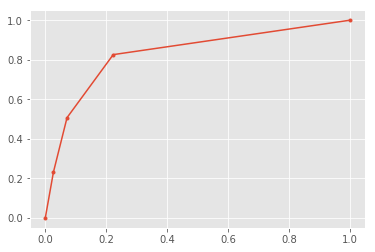

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
#pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()
print (accuracy_score(y_test,probs))
print (f1_score(y_test,y_pred_B))
print(precision_score(y_test,y_pred_B))
print(recall_score(y_test,y_pred_B))
print(roc_auc_score(y_test,y_pred_B))
print(confusion_matrix(y_test,y_pred_B))

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
svd.fit(x_train)  
X_new=svd.fit_transform(x_train)
svd.fit(x_test)
X_n=svd.fit_transform(x_test)
model.fit(X_new, y_train)  
y_pred_B=model.predict(X_n)
#y_pred_SVM
print (accuracy_score(y_test,y_pred_B))
print (f1_score(y_test,y_pred_B))
print(precision_score(y_test,y_pred_B))
print(recall_score(y_test,y_pred_B))
print(roc_auc_score(y_test,y_pred_B))
print(confusion_matrix(y_test,y_pred_B))

In [105]:
(s.Result[83])

'investigation : x-ray - chest ap ( portable ) view , 697/36 cn result : FTR . ADJ cervical rib RISK . cardiac size can not assessed ( ap view ) .'

In [90]:
n=0
d=0
e=0
o=[]
f=[]
for i,j in s.iterrows():
    text=s.Result[i]
    if(s.Pleural_effusion[i]==1):
        n+=1
    to=tokenizer.tokenize(text)
    c=0
    k=0
    for x in to:
        if('FTR' in x):
            #print(c)
            c=1
            #print(c)
            if(s.Pleural_effusion[i]==1):
                k=1
        if('FTR' not in x and s.Pleural_effusion[i]==1):
            o.append(text)
            f.append(i)
            
    if(c==1):
        #print(c)
        d+=1
        #print(d)
    if(k==1):
        e+=1
        
for x in range(len(o)):
    print(f[x])
    print(o[x])
    print("-------------------------------")
print(n,d,e)
    

50
chest pa view nk basal atelectasis lung RISK right RISK left pleural effusion
-------------------------------
311
chest ap portable view nk ADJ RISK lower zone cp angle suggestive effusion hilum normal pulmonary vasculature is normal boderline cadiomegaly is RISK trachea is central no_mediastinal shift is RISK bony thorax soft tissue chest wall normal
-------------------------------
606
rg d liver is enlarged smooth outline normal echogenecity visualised part show obvious sol biliary dilatation gall bladder thickwalled edematous portal vein cbd dilated pancreas head normal rest obscured spleen is normal size echotexture no_retroperitoneal lymphadenopathy RISK ADJ kidney normal size shape echogenicity no_focal lesion calculus RISK corticomedullary differentiation is maintained ADJ pelvicalyceal system dilated right kidney measure cm left kidney measure cm urinary bladder is empty uterus is anteverted normal size no_focal myometrial lesion RISK endometrial canal is distended fluid mod